In [1]:
from google.colab import drive #Dataset mounted from google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = "/content/drive/MyDrive/Emotion_final.csv"

In [3]:
import numpy as np
import pandas as pd # Used pandas for data manipulation, analysis and cleaning
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
import nltk
from nltk.corpus import stopwords
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import re
import bs4
import requests
import spacy
import en_core_web_sm
from spacy import displacy
nlp = en_core_web_sm.load()
from spacy.matcher import Matcher
from spacy.tokens import Span 
import networkx as nx
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [4]:
datasentiment = pd.read_csv(path)

In [5]:
datasentiment 

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the governing parties pummelled by a dismayed electora,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed coup,fear


In [6]:
datasentiment.info() # summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [7]:
datasentiment.head()  #observing top 5 rows of the dataset

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love
4,i am feeling grouchy,anger


In [8]:
datasentiment.tail() #observing bottom 5 rows of the dataset


,Text,Emotion
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the governing parties pummelled by a dismayed electora,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed coup,fear
21458,"I am dismayed , but not surpris",fear


In [9]:
datasentiment.shape 

(21459, 2)

In [10]:
def remove_punctuation(text): #function for removing punctuation
    import string 
    translator = str.maketrans('', '', string.punctuation) #replace the punctuations with no space
    return text.translate(translator)

In [11]:
datasentiment['Text'] = datasentiment['Text'].apply(remove_punctuation)
datasentiment.head(10) #observing first 10 rows to confirm punctuation removal

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasnt sure why that was,sadness
6,ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny,surprise
7,i feel as confused about life as a teenager or as jaded as a year old man,fear
8,i have been with petronas for years i feel that petronas has performed well and made a huge profit,happy
9,i feel romantic too,love


In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# extracting the stopwords from nltk library
sw = stopwords.words('english') 
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [14]:
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw] # removing the stop words and lowercasing the selected words
    return " ".join(text) 

In [15]:
datasentiment['Text'] = datasentiment['Text'].apply(stopwords)
datasentiment.head(10) #observing first 10 rows to confirm stopwords are removed


,Text,Emotion
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around someone cares awake,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still property,love
4,feeling grouchy,anger
5,ive feeling little burdened lately wasnt sure,sadness
6,ive taking milligrams times recommended amount ive fallen asleep lot faster also feel like funny,surprise
7,feel confused life teenager jaded year old man,fear
8,petronas years feel petronas performed well made huge profit,happy
9,feel romantic,love


In [16]:
# Specifying special characters to be removed
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","â€“","ï¿½","$"]

In [17]:
for char in spec_chars:
    datasentiment['Text'] = datasentiment['Text'].str.replace(char, ' ') #removing special character and replacing it with space

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [18]:
datasentiment.head() #observing first 5 rows to confirm special characters are removed

,Text,Emotion
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around someone cares awake,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still property,love
4,feeling grouchy,anger


In [19]:
# function to remove numbers
def number_removal(text):
    if type(text) == int:
        return text
    else:
        text = ''.join([i for i in text if not i.isdigit()])
        return text

In [20]:
datasentiment['Text'] = datasentiment['Text'].apply(number_removal)
datasentiment.head() #observing first 5 rows to confirm numbers are removed

,Text,Emotion
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around someone cares awake,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still property,love
4,feeling grouchy,anger


In [21]:
ADDITIONAL_STOPWORDS = ['dont','cant','im', 'ive', 'int64','dtype','href'] #added stop words after visualizing wordcloud

In [22]:
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer() #All the words that are not designated as a stop word is then lemmatized after encoding 
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [23]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
words = basic_clean(''.join(str(datasentiment['Text'].tolist())))

In [25]:
words[:30]

['didnt',
 'feel',
 'humiliated',
 'go',
 'feeling',
 'hopeless',
 'damned',
 'hopeful',
 'around',
 'someone',
 'care',
 'awake',
 'grabbing',
 'minute',
 'post',
 'feel',
 'greedy',
 'wrong',
 'ever',
 'feeling',
 'nostalgic',
 'fireplace',
 'know',
 'still',
 'property',
 'feeling',
 'grouchy',
 'feeling',
 'little',
 'burdened']

In [26]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:30]

(feel, like)         2267
(make, feel)          375
(feeling, little)     271
(still, feel)         231
(feel, little)        228
(feeling, like)       207
(feeling, bit)        200
(feel, really)        189
(feeling, pretty)     183
(feel, bit)           164
(made, feel)          159
(time, feel)          156
(know, feel)          145
(always, feel)        138
(didnt, feel)         136
(help, feel)          135
(still, feeling)      131
(would, feel)         131
(day, feel)           129
(feel, pretty)        127
(want, feel)          127
(really, feel)        125
(feeling, really)     124
(left, feeling)       119
(could, feel)         112
(also, feel)          111
(even, though)        109
(life, feel)          107
(feel, need)          104
(feeling, quite)       98
dtype: int64

In [27]:
bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:30]

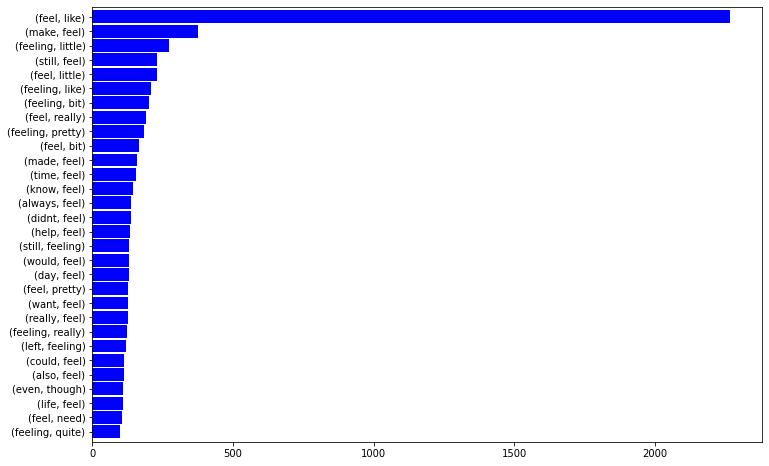

In [28]:
bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

In [29]:
ngram_vect = CountVectorizer(ngram_range=(2,2))
X_counts = ngram_vect.fit_transform(datasentiment['Text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

Output hidden; open in https://colab.research.google.com to view.

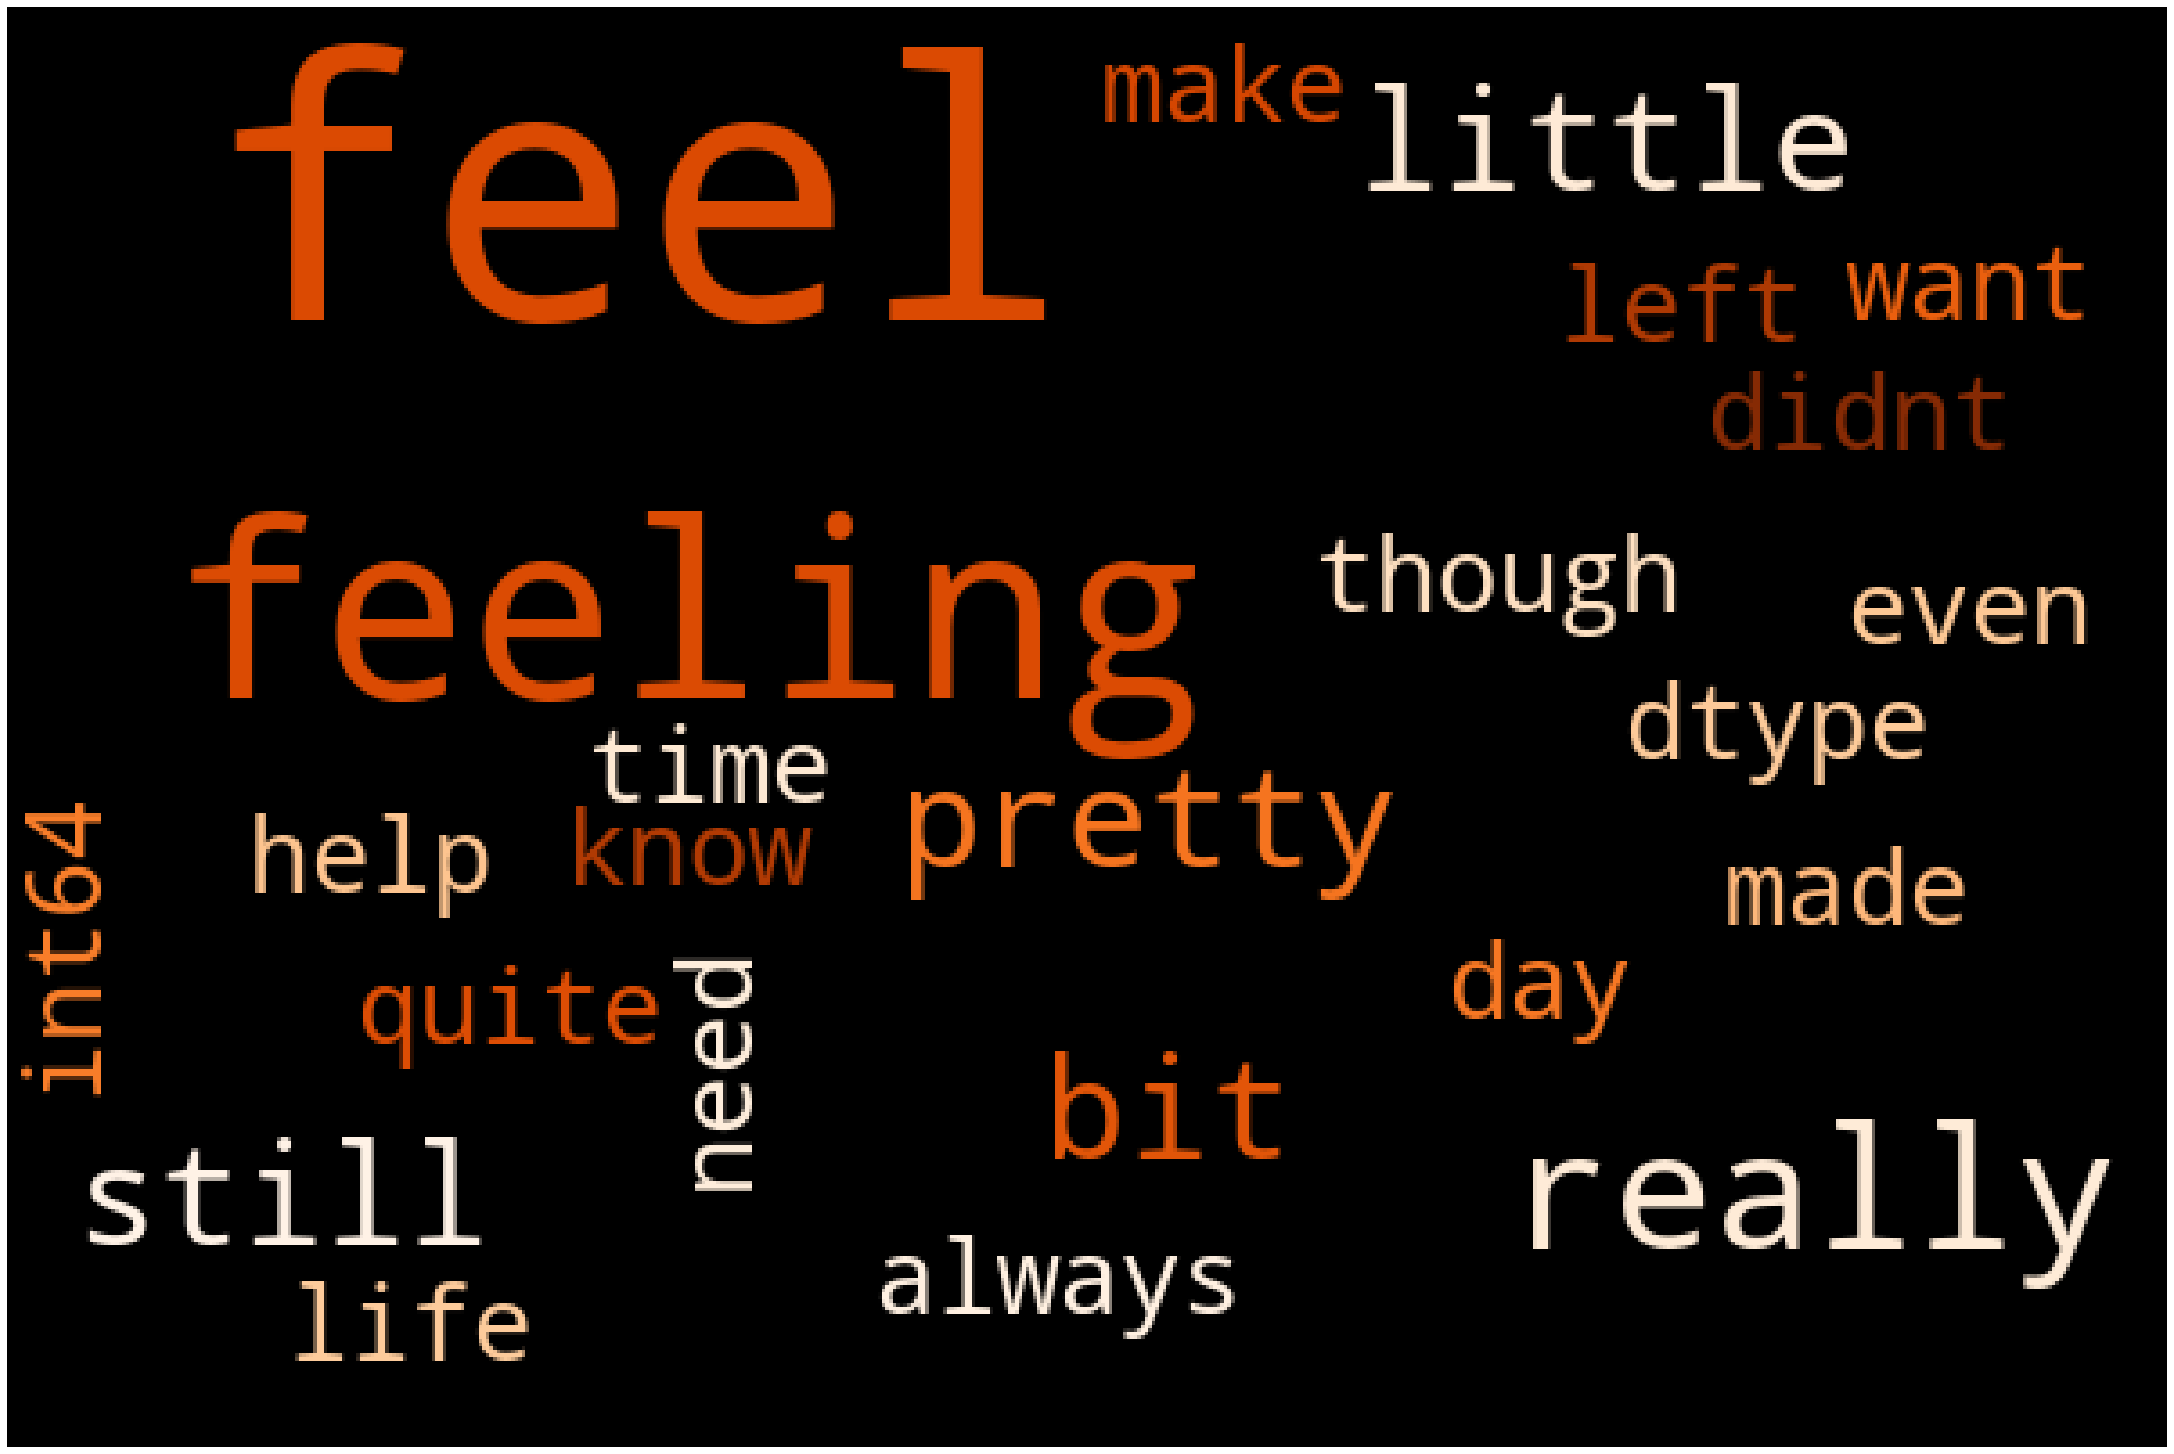

In [30]:
from wordcloud import WordCloud 
img = WordCloud(width = 600, height = 400,
                          background_color='black', colormap = 'Oranges',
                          max_words=200,
                          max_font_size=100,
                          random_state=42
                         ).generate(str(bigrams))

plt.figure(figsize=(30,20))
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(img)
plt.axis('off')
plt.show()

In [31]:
unigrams = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:30]

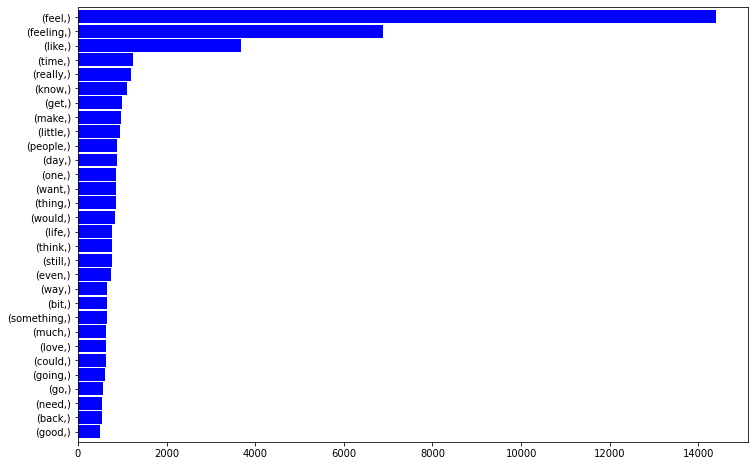

In [32]:
unigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

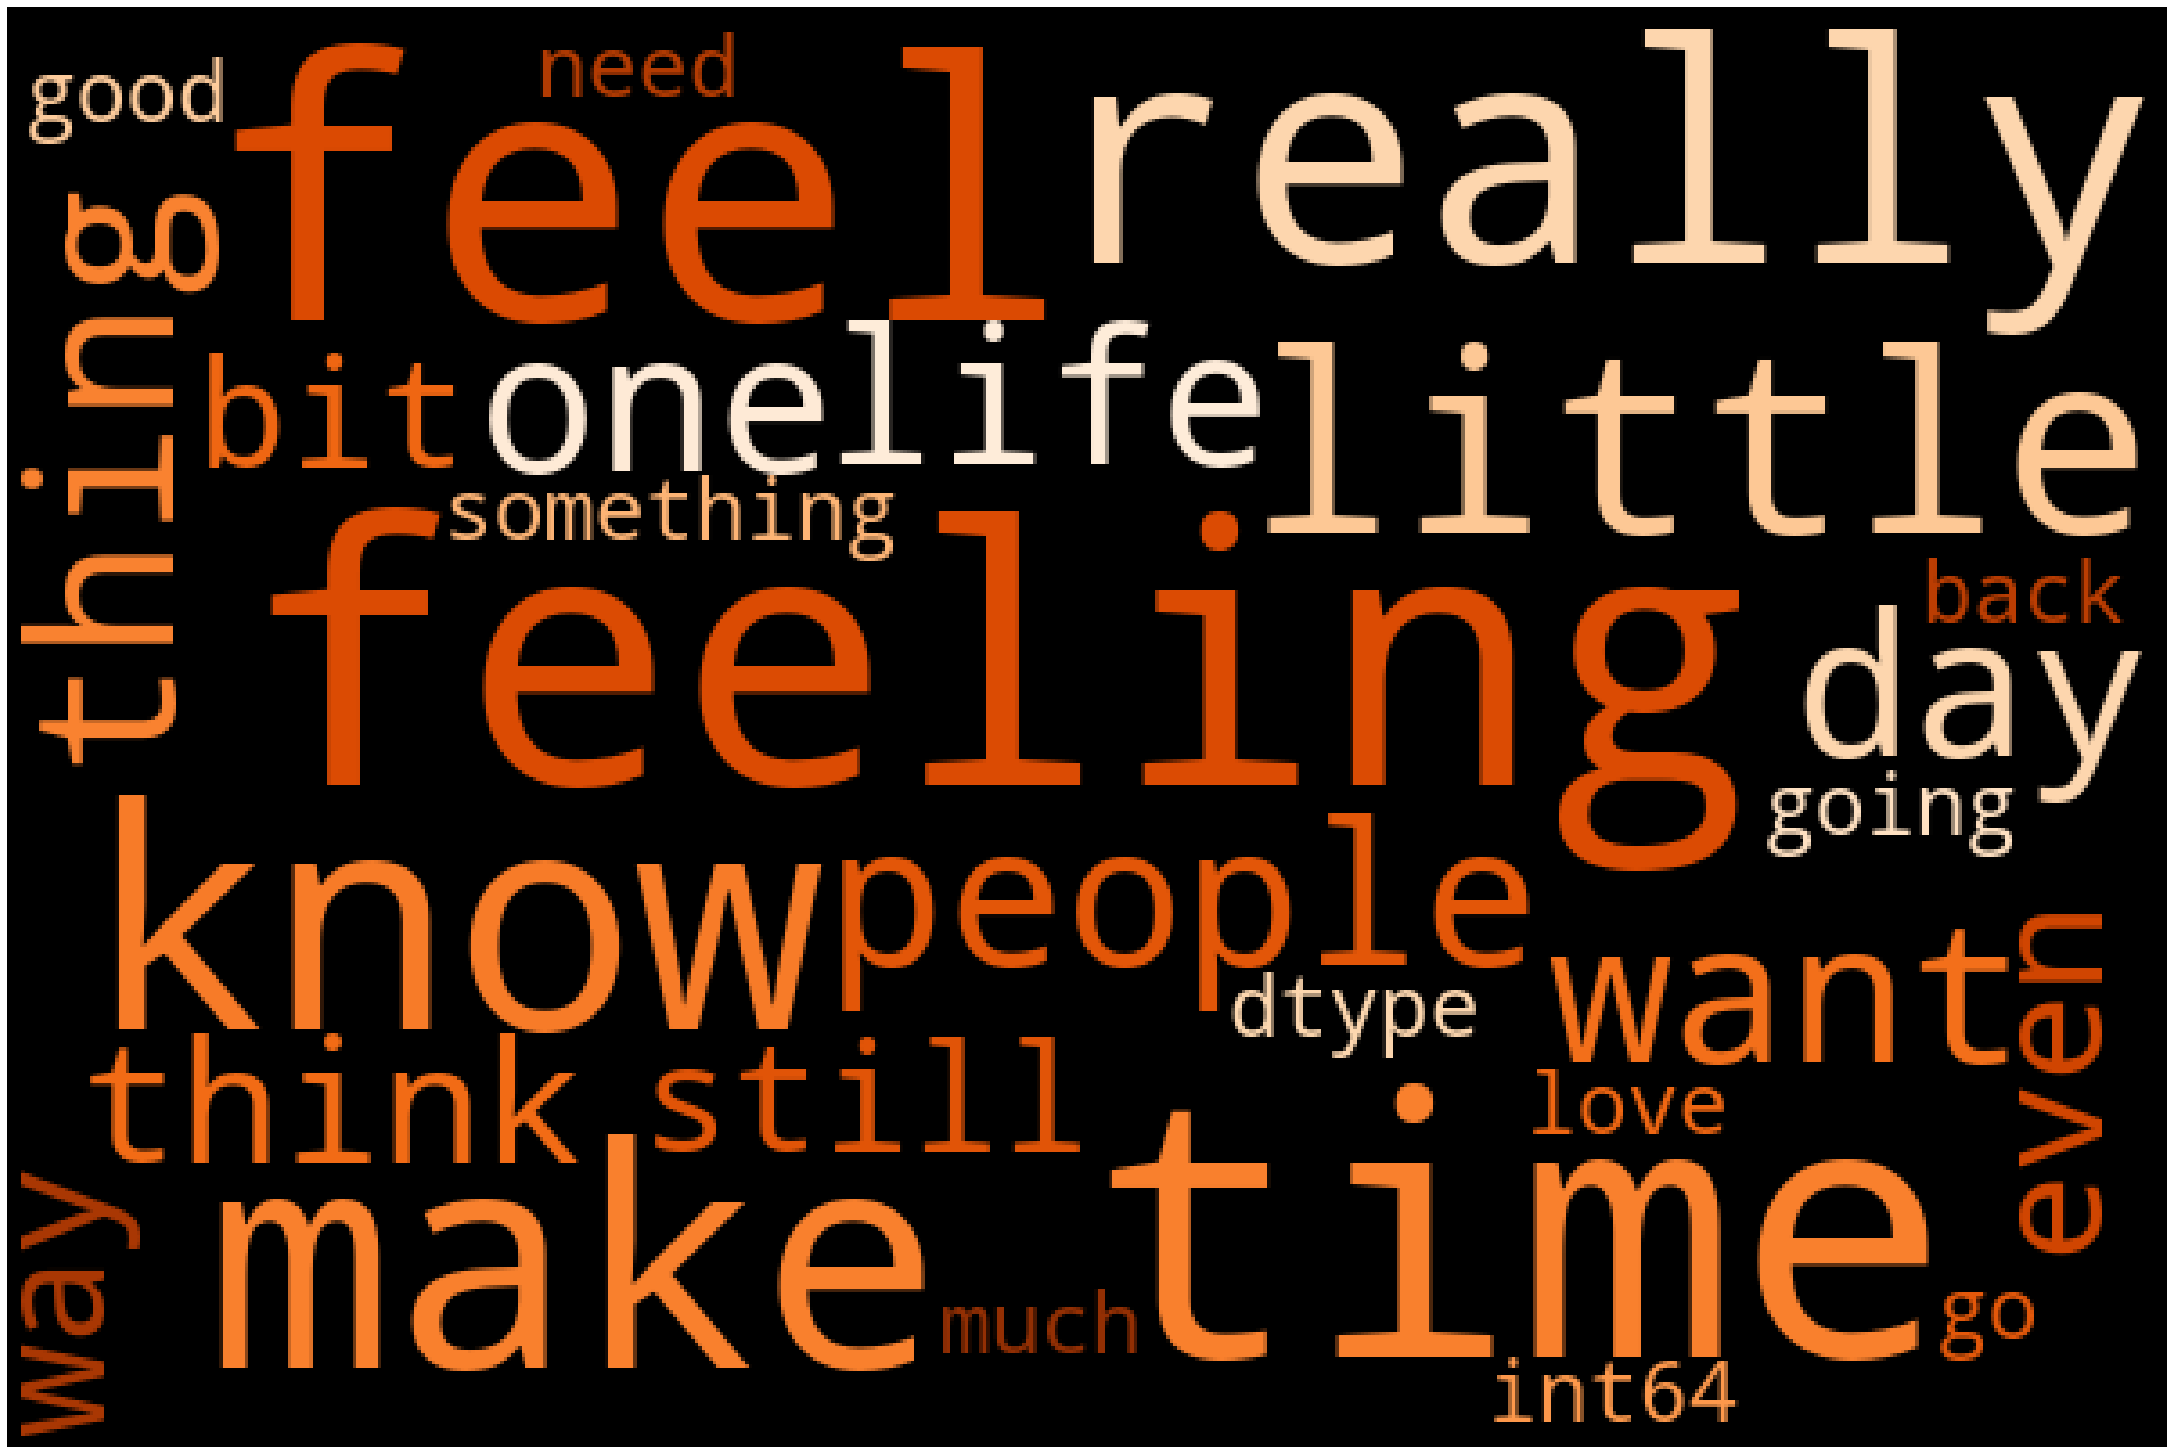

In [34]:
from wordcloud import WordCloud 
img = WordCloud(width = 600, height = 400,
                          background_color='black', colormap = 'Oranges',
                          max_words=200,
                          max_font_size=100,
                          random_state=42
                         ).generate(str(unigrams))

plt.figure(figsize=(30,20))
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(img)
plt.axis('off')
plt.show()

In [35]:
#transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(datasentiment['Text']).toarray()

# tf_feature_names represents what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [36]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [37]:
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [38]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [39]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,feel,1571.9,feel,1424.4,feeling,712.5,feel,2869.4,feel,987.1,feeling,3521.3,feel,1539.3,feel,2369.1,feel,2028.9,feeling,1230.1
1,like,634.7,really,418.1,feel,671.2,like,1591.1,feeling,348.1,im,1689.2,still,518.8,would,606.5,like,351.7,bit,339.0
2,time,438.1,feeling,412.1,could,412.6,im,463.5,without,171.4,little,297.6,know,259.7,people,487.1,days,222.6,feel,294.7
3,im,271.2,pretty,401.7,feelings,223.4,something,346.9,day,168.4,feel,217.9,make,236.0,know,457.6,see,173.1,little,292.5
4,things,202.6,like,378.6,get,165.0,makes,260.6,much,164.3,left,190.5,help,219.7,like,423.3,times,145.8,time,240.4
5,really,199.0,today,354.0,im,146.9,one,248.4,like,160.4,morning,179.6,people,219.1,even,391.3,get,142.8,last,234.9
6,know,195.1,ive,221.5,hope,130.9,look,228.5,home,153.8,stressed,171.4,bad,214.1,want,387.3,think,137.7,got,204.7
7,sometimes,179.5,im,206.7,eyes,130.3,person,191.7,every,150.7,day,169.9,http,209.6,life,353.7,must,133.6,ive,203.5
8,afraid,132.8,made,200.9,find,110.8,much,185.7,time,147.8,get,163.2,href,207.1,though,340.6,looking,132.3,im,163.4
9,cant,114.5,excited,155.4,amp,103.1,love,176.3,way,117.7,anxious,161.1,cant,187.4,dont,324.5,strange,130.5,back,159.4


In [40]:
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit(datasentiment['Text'])
txt_transformed = txt_fitted.transform(datasentiment['Text'])
print ("The text: ", datasentiment['Text'])

The text:  0                                                                didnt feel humiliated
1                        go feeling hopeless damned hopeful around someone cares awake
2                                            im grabbing minute post feel greedy wrong
3                                 ever feeling nostalgic fireplace know still property
4                                                                      feeling grouchy
                                             ...                                      
21454                                                       melissa stared friend dism
21455    successive state elections seen governing parties pummelled dismayed electora
21456                                                         vincent irritated dismay
21457                                       kendallhume turned back face dismayed coup
21458                                                                 dismayed surpris
Name: Text, Length: 21459, dtype

In [41]:
ab = tf.vocabulary_
ab

{'didnt': 4558,
 'feel': 6188,
 'humiliated': 8102,
 'go': 7128,
 'feeling': 6192,
 'hopeless': 7980,
 'damned': 4027,
 'hopeful': 7977,
 'around': 868,
 'someone': 15614,
 'cares': 2445,
 'awake': 1153,
 'im': 8255,
 'grabbing': 7215,
 'minute': 10674,
 'post': 12805,
 'greedy': 7292,
 'wrong': 18912,
 'ever': 5756,
 'nostalgic': 11433,
 'fireplace': 6345,
 'know': 9336,
 'still': 16055,
 'property': 13156,
 'grouchy': 7353,
 'ive': 8883,
 'little': 9817,
 'burdened': 2217,
 'lately': 9473,
 'wasnt': 18417,
 'sure': 16455,
 'taking': 16647,
 'milligrams': 10621,
 'times': 17105,
 'recommended': 13663,
 'amount': 574,
 'fallen': 6062,
 'asleep': 946,
 'lot': 9944,
 'faster': 6119,
 'also': 511,
 'like': 9730,
 'funny': 6823,
 'confused': 3368,
 'life': 9697,
 'teenager': 16787,
 'jaded': 8902,
 'year': 18973,
 'old': 11656,
 'man': 10168,
 'petronas': 12389,
 'years': 18982,
 'performed': 12307,
 'well': 18522,
 'made': 10083,
 'huge': 8075,
 'profit': 13100,
 'romantic': 14299,
 'make

In [42]:
freq={}
for word in words:
    count=freq.get(word,0)
    freq[word]=count + 1

In [43]:
frequency_list = freq.keys()

In [44]:
for words in frequency_list:
    print(words + ' -> ' + str(freq[words]))

Streaming output truncated to the last 5000 lines.
humility -> 4
hypocritical -> 1
bard -> 1
hillary -> 1
eluded -> 1
colin -> 1
entirelly -> 1
undertaken -> 1
dawning -> 3
marlowe -> 1
humanity -> 3
ruthless -> 2
rapacity -> 1
susanna -> 1
visting -> 1
devestated -> 1
grave -> 5
andangry -> 1
glint -> 1
pathological -> 1
autistics -> 1
overslept -> 1
drape -> 1
conection -> 1
customized -> 1
winey -> 1
scummy -> 1
killer -> 5
accompanied -> 4
autism -> 1
witless -> 1
bontoc -> 1
ribbon -> 1
daydream -> 2
flossing -> 1
sabbatical -> 2
embedded -> 1
oxbow -> 1
kentucky -> 2
preakness -> 1
sloan -> 1
utah -> 2
wept -> 5
replied -> 6
logistics -> 1
prediction -> 1
fixing -> 2
cathing -> 1
pierce -> 1
thatrupert -> 1
intend -> 4
jam -> 2
jazzed -> 1
biz -> 1
confirm -> 2
kierkegaard -> 1
philosopher -> 1
facilitate -> 1
interference -> 2
stunted -> 1
instilled -> 2
headcold -> 1
assure -> 3
perusal -> 1
intensifying -> 1
recruiter -> 2
opiate -> 1
infant -> 1
clairee -> 1
undecorating -> 1

In [45]:
results = []

In [46]:
for word in frequency_list:
    tuple = (word, freq[word])
    results.append(tuple)

In [47]:
byFreq=sorted(results, key=lambda word: word[1], reverse=True)

In [48]:
words_names=[]
words_count=[]
for (word, freq) in byFreq[:30]:
    print (word, freq)
    words_names.append(word)
    words_count.append(freq)

feel 14391
feeling 6886
like 3672
time 1252
really 1201
know 1116
get 1001
make 964
little 960
people 883
day 872
one 861
want 855
thing 852
would 847
life 766
think 762
still 760
even 745
way 664
bit 658
something 646
much 643
love 640
could 627
going 618
go 564
need 549
back 545
good 508


In [49]:
words_names=[]
words_count=[]
for (word, freq) in byFreq[:30]:
    print (word, freq)
    words_names.append(word)
    words_count.append(freq)

feel 14391
feeling 6886
like 3672
time 1252
really 1201
know 1116
get 1001
make 964
little 960
people 883
day 872
one 861
want 855
thing 852
would 847
life 766
think 762
still 760
even 745
way 664
bit 658
something 646
much 643
love 640
could 627
going 618
go 564
need 549
back 545
good 508


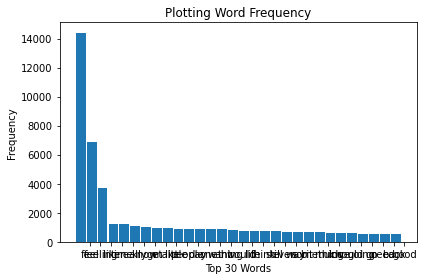

In [50]:
# Plotting histogram 
plt.xlabel('Top 30 Words')
plt.ylabel('Frequency')
plt.title('Plotting Word Frequency')
indexes = np.arange(len(words_names) )
width = 0.9
plt.bar(indexes, words_count, width)
plt.xticks(indexes + width * 0.9, words_names)
plt.tight_layout()
plt.show()

In [51]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [52]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [53]:
sid = SentimentIntensityAnalyzer()

In [54]:
# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
scores = sid.polarity_scores(str(datasentiment['Text']))

In [55]:
#loop through the keys contained in scores (pos, neu, neg, and compound scores) and print the key-value pairs on the screen

for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')

compound: -0.8613, neg: 0.301, neu: 0.478, pos: 0.221, 

In [56]:
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [57]:
import nltk
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
datasentiment['Text'] = datasentiment['Text'].apply(tokenize)
datasentiment.head()

,Text,Emotion
0,"[didnt, feel, humiliated]",sadness
1,"[go, feeling, hopeless, damned, hopeful, around, someone, cares, awake]",sadness
2,"[im, grabbing, minute, post, feel, greedy, wrong]",anger
3,"[ever, feeling, nostalgic, fireplace, know, still, property]",love
4,"[feeling, grouchy]",anger


In [59]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(datasentiment['Text'])
# Create Corpus
texts = datasentiment['Text']
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [60]:
import gensim
from gensim import corpora
from gensim import models
from gensim.models import LdaModel
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=20)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.096*"feeling" + 0.055*"im" + 0.021*"rather" + 0.020*"right" + '
  '0.018*"feel" + 0.014*"much" + 0.013*"must" + 0.013*"able" + 0.012*"yet" + '
  '0.012*"without"'),
 (1,
  '0.072*"feel" + 0.022*"seemed" + 0.019*"man" + 0.016*"like" + 0.015*"asked" '
  '+ 0.015*"became" + 0.014*"amazing" + 0.011*"years" + 0.011*"suddenly" + '
  '0.010*"tired"'),
 (2,
  '0.088*"feel" + 0.025*"like" + 0.021*"deep" + 0.018*"devastated" + '
  '0.016*"hard" + 0.015*"resentful" + 0.013*"miss" + 0.013*"ecstatic" + '
  '0.012*"despair" + 0.012*"within"'),
 (3,
  '0.089*"feel" + 0.035*"like" + 0.022*"look" + 0.021*"eyes" + 0.015*"want" + '
  '0.015*"sometimes" + 0.014*"time" + 0.013*"people" + 0.012*"one" + '
  '0.007*"face"'),
 (4,
  '0.062*"feel" + 0.037*"feeling" + 0.021*"excitement" + 0.020*"im" + '
  '0.019*"pleased" + 0.017*"guilty" + 0.016*"things" + 0.016*"talk" + '
  '0.015*"let" + 0.014*"mother"'),
 (5,
  '0.086*"feel" + 0.021*"sense" + 0.021*"like" + 0.017*"weird" + '
  '0.016*"passionate" +

In [ ]:
!pip install pyLDAvis

In [61]:
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [62]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [63]:
pyLDAvis.enable_notebook()

In [64]:
import os
LDAvis_data_filepath = os.path.join('E:\implementation\ldavis_prepared_'+str(num_topics))

<input>:2: DeprecationWarning: invalid escape sequence \i
<ipython-input-64-1a291a788d00>:2: DeprecationWarning: invalid escape sequence \i
  LDAvis_data_filepath = os.path.join('E:\implementation\ldavis_prepared_'+str(num_topics))


In [ ]:
!pip install --upgrade pandas

In [ ]:
!pip uninstall pandas
!pip install pandas

In [65]:
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [66]:
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

In [67]:
pyLDAvis.save_html(LDAvis_prepared, 'E:\implementation\ldavis_prepared_'+str(num_topics) +'.html')

<input>:1: DeprecationWarning: invalid escape sequence \i
<ipython-input-67-f27b806efbcc>:1: DeprecationWarning: invalid escape sequence \i
  pyLDAvis.save_html(LDAvis_prepared, 'E:\implementation\ldavis_prepared_'+str(num_topics) +'.html')


In [68]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
3      0.092805  0.103451       1        1  6.936937
13     0.049446  0.076982       2        1  6.843839
6     -0.179401 -0.016851       3        1  6.748274
11     0.035877  0.083441       4        1  6.605942
12    -0.120096  0.009818       5        1  5.572798
7     -0.070500 -0.018869       6        1  5.526208
0     -0.187560 -0.071733       7        1  5.482384
10    -0.009485  0.095958       8        1  5.473822
9     -0.022635  0.065303       9        1  5.005920
8     -0.056254  0.050893      10        1  4.906353
1      0.052760  0.087604      11        1  4.845810
17    -0.050545  0.089680      12        1  4.690145
15     0.009700  0.036037      13        1  4.467104
18     0.149999  0.016778      14        1  4.377491
4     -0.043389 -0.097772      15        1  4.118313
16    -0.009792 -0.101404      16        1  4.000035
2      0.108667 -0.036135      17        1  3.759662
19    -0.010285 -0.119060      18        1  3.677096
5      0.154824 -0.129980      19        1  3.500921
14     0.105865 -0.124142      20        1  3.460947, topic_info=         Term          Freq         Total Category  logprob  loglift
7     feeling   6058.000000   6058.000000  Default  30.0000  30.0000
1        feel  12421.000000  12421.000000  Default  29.0000  29.0000
14         im   2821.000000   2821.000000  Default  28.0000  28.0000
561     happy    435.000000    435.000000  Default  27.0000  27.0000
1545   looked    410.000000    410.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
1        feel    537.439907  12421.104606  Topic20  -2.5548   0.2233
1279  beloved     53.508134     94.960983  Topic20  -4.8618   2.7900
73       time     85.697621   1082.020073  Topic20  -4.3908   0.8279
7     feeling    111.853312   6058.754464  Topic20  -4.1245  -0.6284
199       get     59.150360    933.533210  Topic20  -4.7616   0.6047

[1254 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1252      1  0.061913  ability
1252      4  0.908056  ability
144       1  0.012407     able
144       2  0.037221     able
144       3  0.037221     able
...     ...       ...      ...
1536      2  0.040461    youre
1536      9  0.795725    youre
1536     11  0.107895    youre
1536     13  0.026974    youre
1536     15  0.013487    youre

[3834 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 14, 7, 12, 13, 8, 1, 11, 10, 9, 2, 18, 16, 19, 5, 17, 3, 20, 6, 15])